<a href="https://colab.research.google.com/github/MykolaHodovychenko/python/blob/master/lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример 1. Распознавание цветов ириса



Импортируем библиотеки и отдельные модули **pandas**, **numpy**, **scikit-learn** и **matplotlib**

In [0]:
# Работа с n-мерными массивами
import numpy as np
# Работа с DataFrame
import pandas as pd
# Построение графиков
import matplotlib.pyplot as plt
# Класс, реализующий метод k-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# Модуль для разбиения выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split

Данные для импорта находятся в формате CSV.

CSV (от англ. Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных. 

Для загрузки данных в **DataFrame** используем метод **pandas.DataFrame.read_csv()**. Метод считывает данные в формате CSV и возвращает объект класса **DataFrame**.

Атрибут **DataFrame.shape** возвращает размерность **DataFrame**.

In [3]:
# Считываем данные в формате CSV
dataset = pd.read_csv("https://raw.githubusercontent.com/MykolaHodovychenko/python/master/iris.data")
# Выводим тип данных объекта dataset
print(type(dataset))
# Атрибут shape выводит размерность DataFrame
dataset.shape

<class 'pandas.core.frame.DataFrame'>


(150, 5)

Чтобы посмотреть, правильно ли метод **read_csv** импортировал наши данные, выведем на экран некоторые элементы **DataFrame**.

Выведем первые 10 элементов **DataFrame** с помощью метода **pandas.DataFrame.head(n)**, где _n_ - количество элементов.

In [4]:
# Выведем в консоль первые 10 элементов с помощью метода head()
print(dataset.head(10))

   sepal len(cm)  sepal wid(cm)  petal len(cm)  petal wid(cm)        names
0            5.1            3.5            1.4            0.2  Iris-setosa
1            4.9            3.0            1.4            0.2  Iris-setosa
2            4.7            3.2            1.3            0.2  Iris-setosa
3            4.6            3.1            1.5            0.2  Iris-setosa
4            5.0            3.6            1.4            0.2  Iris-setosa
5            5.4            3.9            1.7            0.4  Iris-setosa
6            4.6            3.4            1.4            0.3  Iris-setosa
7            5.0            3.4            1.5            0.2  Iris-setosa
8            4.4            2.9            1.4            0.2  Iris-setosa
9            4.9            3.1            1.5            0.1  Iris-setosa


Для наглядной визуализации данных возьмем 1 и 3 признак (для 2D графика) и выведем признаки для трех классов в виде **диаграммы рассеяния (scatter plot)**. 

**Диаграмма рассеяния** - математическая диаграмма, изображающая значения двух переменных в виде точек на декартовой плоскости.

Два признака можно передать напрямую из **DataFrame**, но давайте выделим 1 и 3 признак в отдельный массив. 

Для извлечения данных из DataFrame используется метод **pandas.DataFrame.iloc**. Метод **iloc** позволяет нам извлекать строки и столбцы по их местоположению. Для указания столбцов и строк используется механизм слайсов (slices).

Атрибут **values** возвращает данные, хранящиеся в DataFrame, в виде двумерного массива **ndarray**.

In [0]:
# Извлекаем все строки [:] и столбцы 0 и 2 [0,2]
# в отдельный DataFrame.
# Атрибут values возвращает DataFrame в виде ndarray
# (n-мерный) массив numpy
fset = dataset.iloc[: ,[0,2]].values
type(fset)

numpy.ndarray

Теперь нам необходимо вывести на экран диаграмму рассеяния двух параметров для трех классов (сорта ириса).

Для построения диаграммы рассеяния используем подключенный модуль **matplotlib.pyplot**, который представляет собой набор процедурных функций в стиле MATLAB.

**Pyplot** работает следующим образом - каждый вызов функции из модуля **pyplot** изменяет график - добавляет данные, добавляет подписи к осям, изменяет цвет и форму точек в диаграмме и так далее.

После вызова всех нужных функций, вызывается метод **pyplot.show()**, который показыват настроенный и сконфигурированный график или диаграмму.

Приведем пример диаграммы рассеяния.

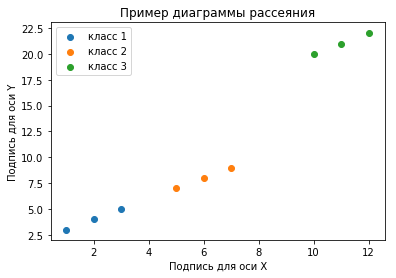

In [0]:
plt.scatter([1,2,3],[3,4,5], label="класс 1") # Добавляем точки для 1 класса
plt.scatter([5,6,7],[7,8,9], label="класс 2") # Добавляем точки для 2 класса
plt.scatter([10,11,12],[20,21,22], label="класс 3")# Добавляем точки для 3 класса
plt.xlabel("Подпись для оси Х") # Добавляем подпись для оси Х
plt.ylabel("Подпись для оси Y") # Добавляем подпись для оси Y
plt.legend(loc="upper left") # Добавляем легенду
plt.title("Пример диаграммы рассеяния") # Добавляем заголовок
plt.show() # Выводим на экран сконфигурированную диаграмму

Для добавления данных в диаграмму вызывается метод **pyplot.scatter(x, y)**, которому нужно передать точки для x и y. Дополнительно вы можете указать много различных параметров, включая цвет точек, форму маркера, подпись для легенды и так далее.

Каждый вызов метода **pyplot.scatter(x, y)** означает добавление данных нового класса. В наших данных у нас существует три класса, поэтому вызываем метод **scatter()** три раза и указываем данные для каждого класса.

В нашей выборке содержится 150 экземпляров - по 50 экземпляров для каждого класса. По оси X отолжим точки из первой колонки, по оси Y - из второй колонки.

После этого добавим подписи к осям, легенду, заголовок диаграммы и выведем это все на экран.

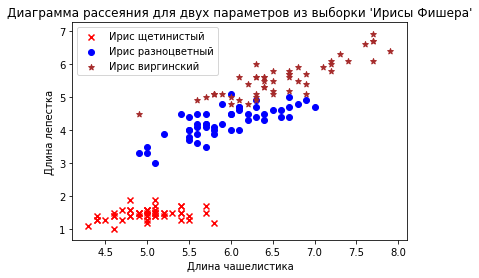

In [0]:
# Указываем точки первого класса
plt.scatter(fset[:50, 0], fset[:50,1], color='red', marker='x', label="Ирис щетинистый")
# Указываем точки второго класса
plt.scatter(fset[50:100, 0], fset[50:100, 1], color='blue', marker='o', label="Ирис разноцветный")
# Указываем точки третьего класса
plt.scatter(fset[100:, 0],fset[100:, 1], color='brown', marker='*', label="Ирис виргинский")
# Добавляем подпись для оси X
plt.xlabel('Длина чашелистика')
# Добавляем подпись для оси Y
plt.ylabel('Длина лепестка')
# Добавляем легенду
plt.legend(loc='upper left')
# Добавляем заголовок к диаграмме
plt.title("Диаграмма рассеяния для двух параметров из выборки 'Ирисы Фишера'")
# выводим диаграмму на экран
plt.show()

Следующй шаг - нам необходимо **разбить выборку на обучающую и тестовую**. Для этого у нас есть специальная функция, но
нам необходимо подготовить наши данные для работы с этой функцией. 

Сперва выделим из нашей выборки (dataset) массив с признаками и массив с ответами. Для этого воспользуемся уже известным нам методом **iloc()** и атрибутом **values**

In [0]:
# Извлекаем все строки и колонки с 0 по 3 включительно и заносим в ndarray
x = dataset.iloc[:, :4].values
# Извлекаем все строки и колонку 4 и заносим в ndarray
y = dataset.iloc[:, 4].values

# Выведем в консоль элементы для проверки правильности разбиения
print("Массив с признаками")
print(x[0:10])
print("Массив с ответами")
print(y[0:10])

Массив с признаками
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
Массив с ответами
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


Названия классов в массиве y называют "категориальными", то есть они описывают факт принадлежности к какой-то категории. Так как алгоритмы машинного обучения оперируют цифрами, нам необходимо закодировать названия классов какими-то числовыми значениями.

То есть: 
- вместо класса **'Iris-setosa'** необходимо подставить **0**;
- вместо класса **'Iris-versicolor'** необходимо подставить **1**;
- вместо класса **'Iris-virginica'** необходимо подставить **2**.

Это можно сделать с помощью готового кодировщика - класса **LabelEncoder** из библиотеки **sklearn.preprocessing**. Но мы поступим иначе и используем метод **numpy.where()**.

Метод **numpy.where(condition, x, y)** - возвращает **x**, если **condition** равно **true**; возвращает **y**, если **condition** равно **false**. То есть, **condition** - это некоторое булевое условие. Если оно выполняется, значение элемента изменится на **x**, если же условие не выполняется, значение элемента изменится на **y**.

В нашем случае, необходимо обойти каждый элемент массива и проверить, равен ли этот элемент названию класса. Если элемент массив равен названию класса, мы меняем значение на какое-то число. Если же условие не выполняется - значение остается неизменным.

In [0]:
# Вместо 'Iris-setosa' подставляем 0
y = np.where(y == 'Iris-setosa', 0, y)
# Вместо 'Iris-versicolor' подставляем 1
y = np.where(y == 'Iris-versicolor', 1, y)
# Вместо 'Iris-virginica' подставляем 2
y = np.where(y == 'Iris-virginica', 2, y)

Для проверки результата - выведем на экран элементы массива **y**

In [0]:
# Выведем элементы на границе 1 и 2 классов
print(y[47:52])
# Выведем элементы на границе 2 и 3 классов
print(y[97:102])

[0 0 0 1 1]
[1 1 1 2 2]


Для корректной работы алгоритма обучения преобразуем **y** из типа **ndarray** в тип **list**

In [0]:
y = list(y)

Теперь данные преобразованы в нужный формат и мы можем разделить выборку на обучающую и тестовую.

Для этого используем метод **sklearn.model_selection.train_test_split()**.

В качестве входных аргументов необходимо передать: массив с признаками, массив с ответами (массив с принадлежностями экземпляра к некоторому классу). 

Также можно указать множество дополнительных аргументов. Мы укажем аргумент **random_state**, который позволяет указать "соль" - специальное значение для инициализации алгоритма генерации псевдослучайных чисел. Аргумент **random_state** позволяет воспроизвести разбиение данных для повторения эксперимента.

Подробнее про метод **train_test_split()** читайте [здесь](https://goo.gl/dJXcNz)

Метод **train_test_split()** возвращает массивы с разбитыми данными. Список параметров следующий (по порядку):
- массив признаков обучающей выборки;
- массив признаков тестовой выборки;
- массив с ответами обучающей выборки;
- массив с ответами тестовой выборки.

In [0]:
# train_x - массив признаков обучающей выборки
# test_x - массив признаков тестовой выборки
# train_y - массив с ответами обучающей выборки
# test_y - массив с ответами тестовой выборки
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=3)

После вызова метода **train_test_split()** мы получим готовые массивы с разбитыми данными.

Теперь переходим непосредственно к выбору метода классификации и будем его обучать. Для первого примера возьмем самый простой и наглядный, но достаточно эффективный метод, который называется **Метод k-ближайших соседей** (**k-nearest neighbors** или просто **KNN**).

Метод работает очень просто - **он относит объекты к классу, которому принадлежит большинство из k его ближайших соседей в многомерном пространстве признаков**.

Для ознакомления с работой метода рекомендую вам прочитать простые и понятные материалы о работе метода: [краткое описание](https://goo.gl/r8L5gh), [подробное описание](https://goo.gl/ErgK1H).

Вас не должна вводить в заблуждение кажущаяся простота метода и его описания в материалах выше - метод имеет много параметров (количество соседей, метрика расстояния, веса элементов и т.д.), модификаций и улучшений - помните об этом.

В нашем простом примере мы будем использовать "дефолтный" метод с параметрами по умолчанию. Изменим только количество ближайших соседей - один из основных параметров метода.

Классификатор KNN доступен нам в класса **sklearn.neighbors.KNeighborsClassifier**. При создании объекта классы мы можем в конструкторе передать нужные нам параметры. Если параметр не будет указан - будет взять значение по-умолчанию.

In [0]:
# Создаем объект класса KNeighborsClassifier, указываем количество соседей
knn = KNeighborsClassifier(n_neighbors=1)

После этого, нам необходимо "обучить" нашу модель. Для этого используется вызываетмя метод fit() у созданного нами объекта. В качестве входных параметров мы передаем массив признаков обучающей выборки и массив с классами обучающей выборки. 

In [0]:
# Обучаем нашу модель, передаем данные для обучения с учителем
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Вот и всё, у нас есть готовая обученная модель. Теперь наша задача - проверить ее эффективность.

В качестве метрики "эффективности" модели просто посчитаем процент успешного распознавания. 
Алгоритм измерения эффективности модели следующий:
1. подаем на вход модели массив с признаками тестовой выборки (массив **test_x**);
2. получаем массив предсказаний модели;
3. сравнивем предсказанные классы с заранее известными классами (массив **test_y**).

Но для начала попробуем подать на вход модели один экземпляр и получим прогноз - к какому классу он относится. Для получения прогноза используем метод **predict()**, который принимает на вход экземпляры данных, а возвращает предсказанные значения их классов.

In [0]:
# Получаем "предсказание" для первого экземпляра из массива test_x
prediction = knn.predict(test_x[:1])

# Выводим в консоль настоящее значение и прогнозное
print("Актуальное значение: класс " + str(test_y[0]))
print("Предсказанное значение: класс " + str(prediction))

Актуальное значение: класс 0
Предсказанное значение: класс [0]


Теперь попробуем получить показатель эффективности предсказания нашей модели. Вручную делать это не стоит - для этого есть специальный метод **score()**, который вызывается у объекта нашей модели. Метод принимает два массива тестовой выборки (массив с признаками и массив с классами) и возвращает значение точности прогноза модели.

In [0]:
score = knn.score(test_x, test_y)
print("Процент успешного прогноза модели: " + str(score))

Процент успешного прогноза модели: 0.947368421053
